In [115]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import sys
from matplotlib import pyplot as plt
import seaborn as sns

In [116]:
pwd

'C:\\Users\\karlarodriguezjerez'

In [117]:
#Import csv file
stroke = pd.read_csv(r"\\Mac\Home\Desktop\ML Python\stroke_data.csv")

In [118]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#look at first rows from data
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Use describe to look at important statistical values
#stroke.describe()
stroke.loc[stroke.id==9046]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [6]:
#look at unique values from categorical columns
print(stroke['work_type'].unique()) 
print(stroke['Residence_type'].unique())
print(stroke['ever_married'].unique())
print(stroke['smoking_status'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['Yes' 'No']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
#Evaluate all categorical columns to see different values
print(stroke.gender.value_counts()) #Other=1, Female=2994, Male 2115
print(stroke.ever_married.value_counts()) #Yes= 3353, No=1757
print(stroke.work_type.value_counts()) #Private 2925,Self-employed  819,children 687,Govt_job 657,Never_worked 22
print(stroke.Residence_type.value_counts())# Urban    2596, Rural    2514
print(stroke.smoking_status.value_counts()) #never smoked  1892,Unknown 1544,formerly smoked 885,smokes 789

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


# Start Cleaning Data

In [8]:
stroke=stroke.drop(index=stroke.loc[stroke.gender=='Other',:].index) #remove other since it's only 1 subject

In [9]:
stroke.gender.value_counts() #check that "other" was in fact removed under gender

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
stroke.isnull().sum() # check if there are null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
stroke.loc[stroke.bmi.isna(),:] #look what the rows with null values look like

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [14]:
#calculate the % of null values to see the impact it copuld potentially have
(stroke.isnull().value_counts("bmi")/len(stroke))*100

bmi
False    96.065766
True      3.934234
dtype: float64

In [15]:
#Since only 3.93% of the total bmi subjects have null values, we are going to replace those nulls with the dataframe mean: 28.89

In [16]:
stroke.mean()

id                   36513.985516
age                     43.229986
hypertension             0.097475
heart_disease            0.054022
avg_glucose_level      106.140399
bmi                     28.894560
stroke                   0.048738
dtype: float64

In [17]:
stroke_filledNaN=stroke.fillna(stroke.mean())

In [18]:
stroke_filledNaN.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
stroke_filledNaN.mean()

id                   36513.985516
age                     43.229986
hypertension             0.097475
heart_disease            0.054022
avg_glucose_level      106.140399
bmi                     28.894560
stroke                   0.048738
dtype: float64

In [20]:
stroke_filledNaN.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [21]:
#A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal---Source: https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20blood%20sugar%20level%20less,mmol%2FL)%20indicates%20prediabetes.
stroke_filledNaN.loc[stroke_filledNaN.avg_glucose_level>=140]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.70000,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.30000,Unknown,0
5076,39935,Female,34.0,0,0,Yes,Private,Rural,174.37,23.00000,never smoked,0
5086,65411,Female,51.0,0,0,Yes,Private,Urban,152.56,21.80000,Unknown,0


The majority of strokes occur in people who are 65 or older. As many as 10% of people in the U.S. who experience a stroke are younger than 45. Source: https://stanfordhealthcare.org/content/dam/SHC/clinics/stroke-center/docs/stroke-young-patients-qa.pdf


In [22]:
stroke_filledNaN.stroke.value_counts() #the dataset is not balanced. We can see that by the number of stroke subjects

0    4860
1     249
Name: stroke, dtype: int64

In [23]:
stroke_filledNaN.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [24]:
#check all those subjects under age 5
stroke_filledNaN.loc[(stroke_filledNaN.age<5)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.89456,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.00000,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.00000,Unknown,0
291,11014,Male,4.00,0,0,No,children,Rural,79.17,20.00000,Unknown,0
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.90000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4990,21743,Male,4.00,0,0,No,children,Urban,85.88,17.70000,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.30000,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.10000,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.80000,Unknown,0


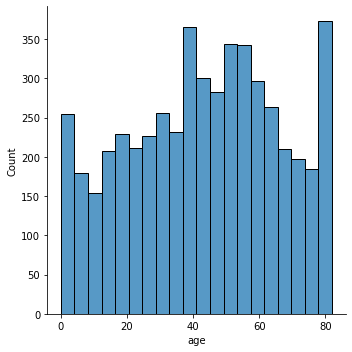

In [25]:
sns.displot(stroke_filledNaN.age) #the majority of the population is older than 40 yeras old. Having concentrations on 40,52,56 and 80 years
#I'd like to focus on the population older than 65 since they are the most prone to strokes. 

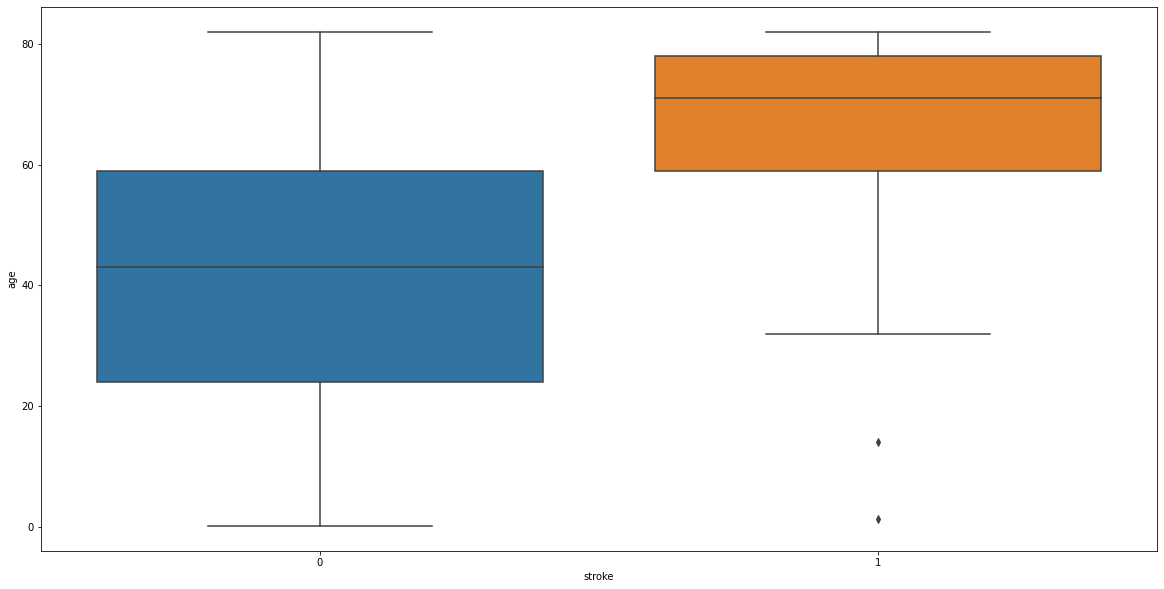

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=stroke_filledNaN.stroke,y=stroke_filledNaN.age)
plt.show() # looks like people over 60 have a HIGHER tendency to have a stroke

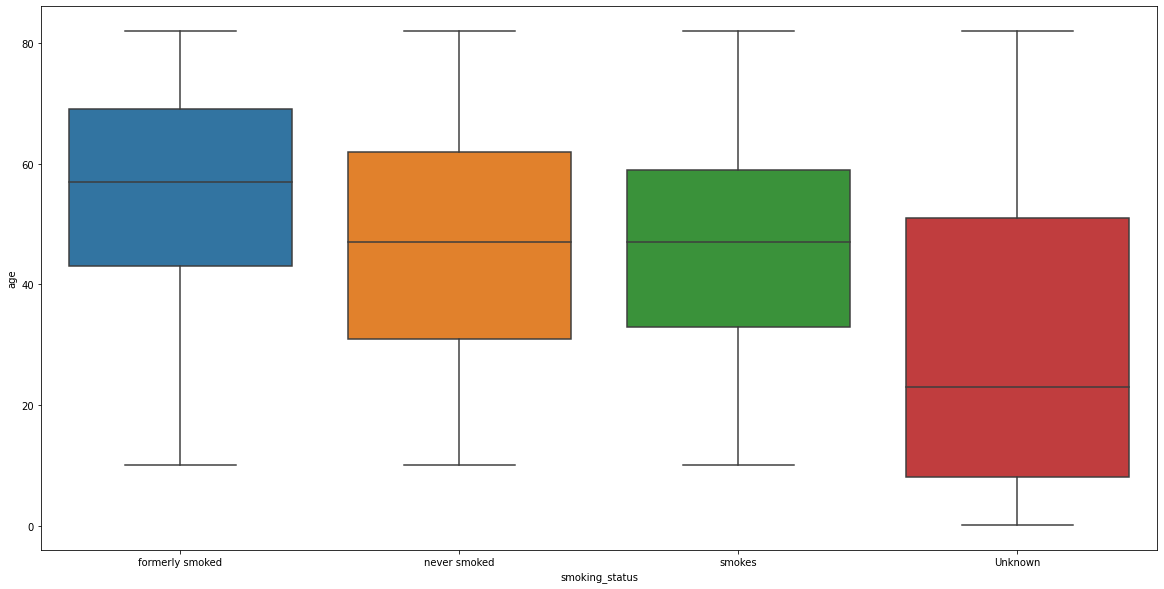

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=stroke_filledNaN.smoking_status,y=stroke_filledNaN.age)
plt.show() # people whose smoking status is "unknown" seem to be the youngest. The population that formerly smoked seems to be the oldest
#And as it is widely known, this population has a tendency to suffer more strokes. Therefore, we must keemp looking into them.

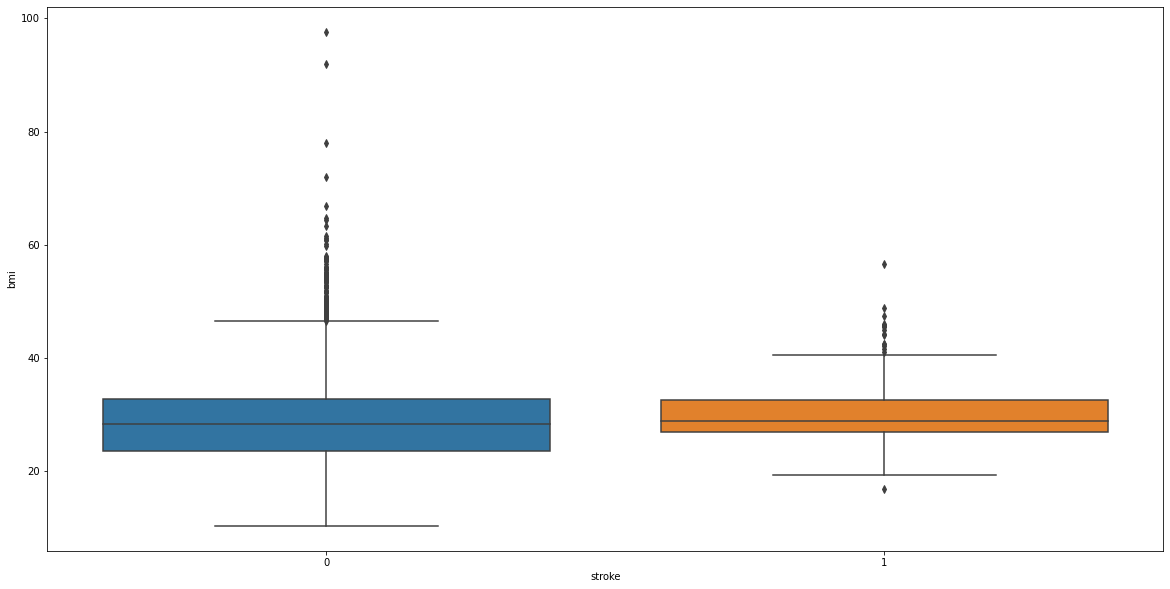

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=stroke_filledNaN.stroke,y=stroke_filledNaN.bmi)
plt.show()#people who have suffered a stroke have a slight tendency for higher bmi's.

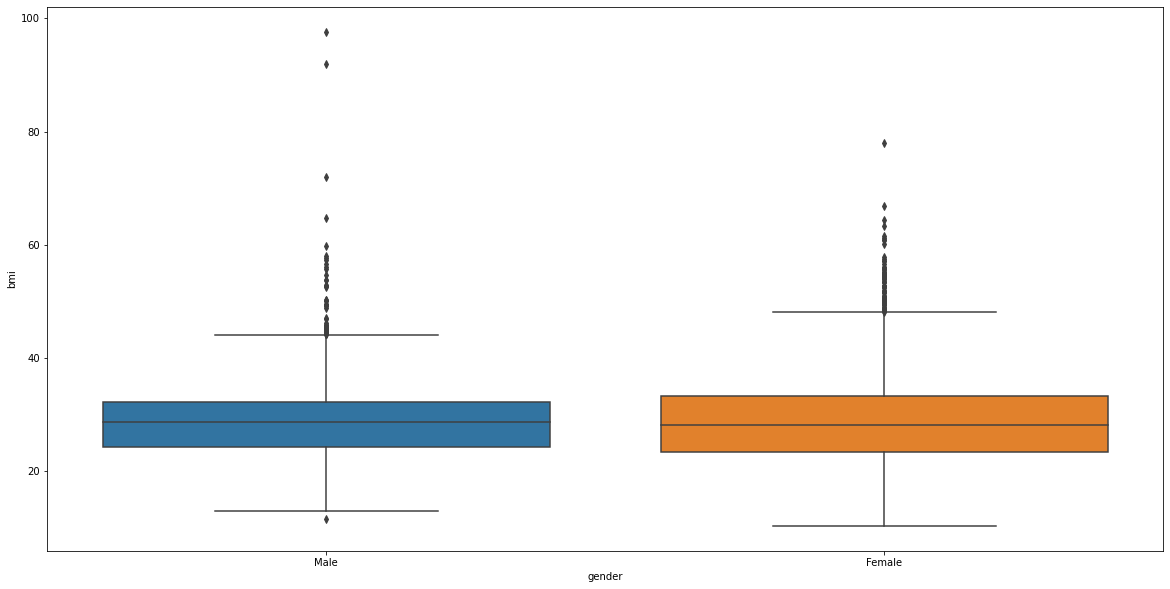

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x=stroke_filledNaN.gender,y=stroke_filledNaN.bmi)
plt.show()# we definitely have more outliers in the males. We even have a very low value for BMI (around 10).
#Females have a broader range on the BMI threshold

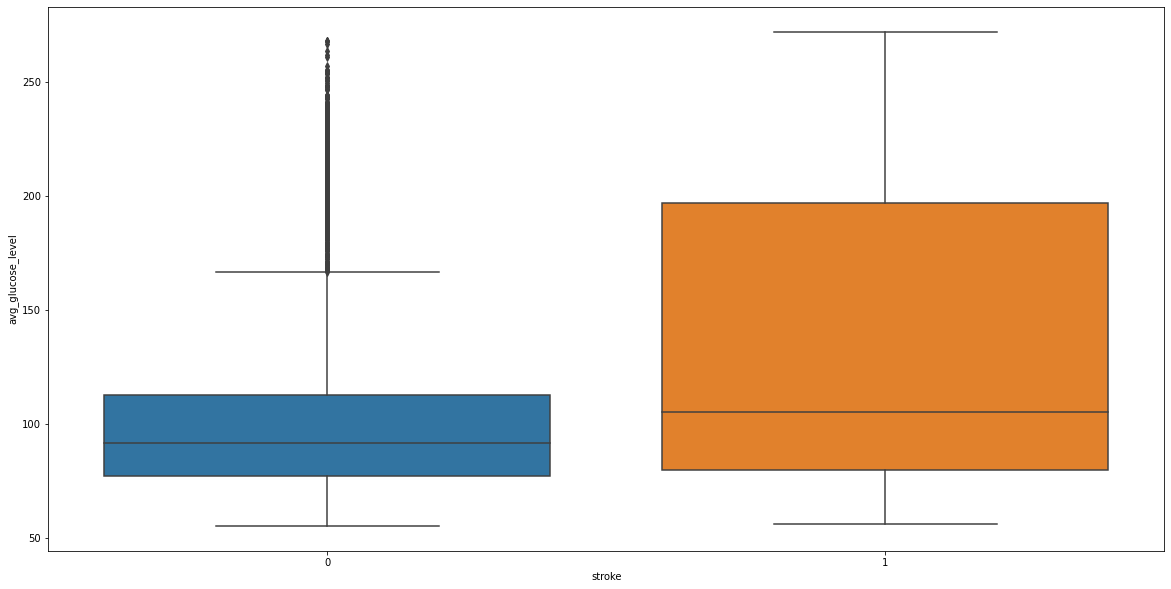

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x=stroke_filledNaN.stroke,y=stroke_filledNaN.avg_glucose_level)
plt.show()# It's clear that people with a higher avg glucose level tend to have more heart attacks

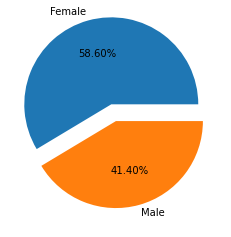

In [31]:
# we have more females than males in this dataset
plt.pie(stroke_filledNaN.gender.value_counts(),labels=stroke_filledNaN.gender.value_counts().index,autopct='%1.2f%%',explode=[0.2,0])
plt.show()

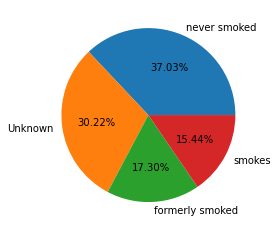

In [32]:
plt.pie(stroke_filledNaN.smoking_status.value_counts(),labels=stroke_filledNaN.smoking_status.value_counts().index,autopct='%1.2f%%')
plt.show()
#dataset is aprox 67% of people who either never smoked or their smoking status is "unknown". This could make this variable less relevant because since we don't have enough data around it.

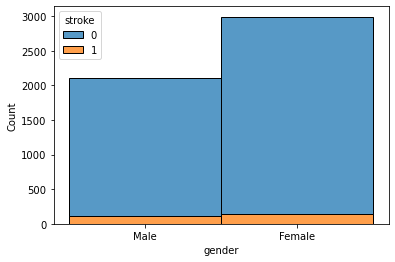

In [33]:
sns.histplot(x="gender",hue="stroke",multiple="stack",data=stroke_filledNaN)
plt.show() #seems like gender isn't really a factor when stroke attacks. Stroke Distribution is similar around both genders

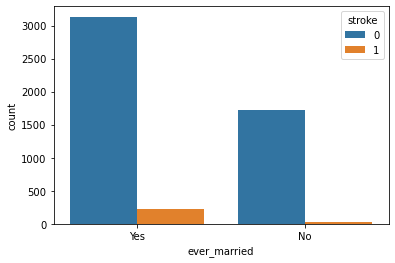

In [34]:
sns.countplot(x="ever_married",hue="stroke",data=stroke_filledNaN)
plt.show()#Looks like married people do have a higher tendency of getting a stroke

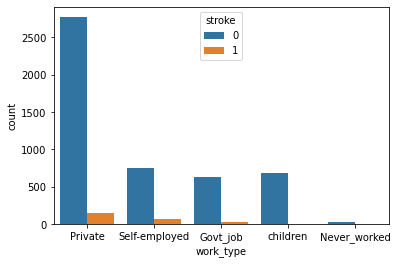

In [35]:
sns.countplot(x="work_type",hue="stroke",data=stroke_filledNaN)
plt.show()#people in the private sector or the ones that are self-employed tend to have more strokes (we could attribute this to more stress)

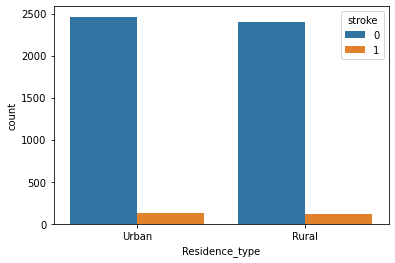

In [36]:
sns.countplot(x="Residence_type",hue="stroke",data=stroke_filledNaN)
plt.show()#Residence type doesn't really show like an influence on stroke condition. 

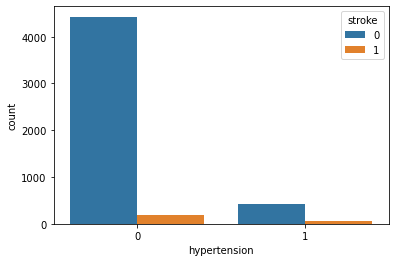

In [37]:
sns.countplot(x="hypertension",hue="stroke",data=stroke_filledNaN)
plt.show()# doesn't look like hypertension is a precondition for those who suffer heart attacks (from the dataset)

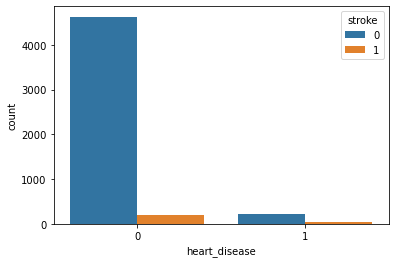

In [38]:
sns.countplot(x="heart_disease",hue="stroke",data=stroke_filledNaN)
plt.show()# doesn't look like heart disease is a precondition for those who suffer heart attacks (from the dataset)

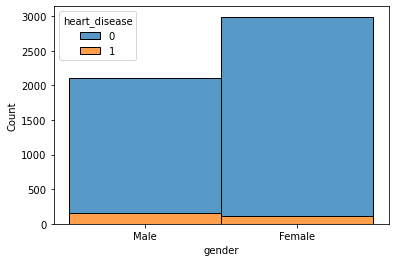

In [39]:
sns.histplot(x="gender",hue="heart_disease",multiple="stack",data=stroke_filledNaN)
plt.show() # looks like men suffer more heart diseases than women

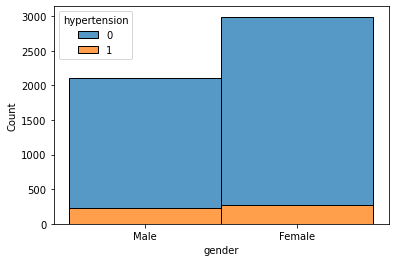

In [40]:
sns.histplot(x="gender",hue="hypertension",multiple="stack",data=stroke_filledNaN)
plt.show() # looks like women suffer more hypertension (slightly)

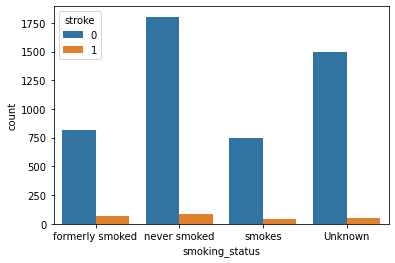

In [41]:
sns.countplot(x="smoking_status",hue="stroke",data=stroke_filledNaN)
plt.show() # from the looks of the data, smoking is not making any kind of influence on strokes. Though people who formerly smoked do have a higher tendecy to get a stroke.
# This could be because smoking is used as an outlet for a lot of people who are stressed. And non-smokers as well as people who formerly smoked don't have that "outlet". 

In [42]:
stroke_filledNaN.groupby(["gender","stroke"]).mean().age
#The mean of men who smoke is slightly higher than women's

gender  stroke
Female  0         42.601935
        1         67.137021
Male    0         41.083388
        1         68.500000
Name: age, dtype: float64

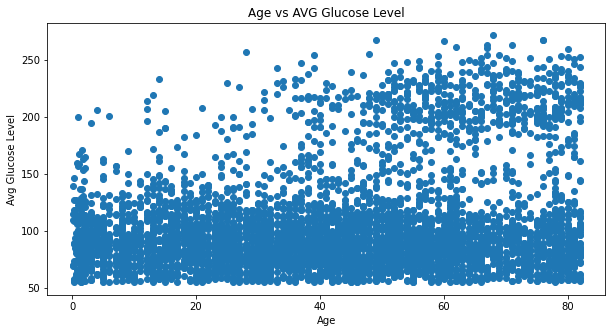

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(stroke_filledNaN.age,stroke_filledNaN.avg_glucose_level)
plt.title("Age vs AVG Glucose Level")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.show() # No tendency on the age vs glucose level

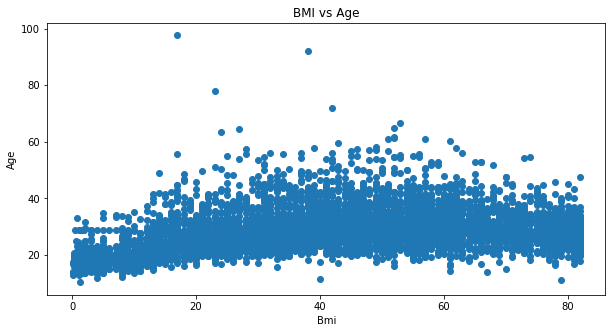

In [123]:
# 18.5 – 24.9 normal BMI men and women. Source: https://www.forbes.com/health/body/bmi-chart-for-men-and-women/
plt.figure(figsize=(10,5))
plt.scatter(stroke_filledNaN.age,stroke_filledNaN.bmi)
plt.title("BMI vs Age")
plt.xlabel("Bmi")
plt.ylabel("Age")
plt.show() # We can see specific outliers like the person with less than 20 years whose BMI is more than 90.
# And we can also see a positive correlation between age and BMI.

In [45]:
#replace gender categorical values with numerical ones
stroke_filledNaN.loc[:,["gender"]] = pd.get_dummies(stroke_filledNaN.gender,drop_first=True).values


In [46]:
stroke_filledNaN.loc[:,["ever_married"]] = pd.get_dummies(stroke_filledNaN.ever_married,drop_first=True).values

In [47]:
stroke_filledNaN.loc[:,["Residence_type"]] = pd.get_dummies(stroke_filledNaN.Residence_type,drop_first=True).values

In [59]:
#Use label encoder to convert smoking_status and work_type to numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
stroke_filledNaN['smoking_status'] = le.fit_transform(stroke_filledNaN['smoking_status'])
stroke_filledNaN['work_type'] = le.fit_transform(stroke_filledNaN['work_type'])

In [68]:
#1=Male, 0=Female--Gender
#1=Yes, 0=No --Ever Married
#1 = Urban,2=Rural --Residence Type
#0=Unknown,1=Formerly Smoked,2=Never Smoked,3=Smokes--Smoking Status
#0=Govt_job,1=Never Worked,2=Private,3=Self-Employed,4=Children--Work Type
stroke_filledNaN.loc[stroke_filledNaN.id==69768] # check value of children under work_type
stroke_filledNaN

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.89456,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.00000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.60000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.60000,1,0


In [69]:
stroke_processed=stroke_filledNaN.drop(['id'],axis=1)# drop id since we won't need it in our analysis

In [70]:
stroke_processed

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.89456,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.00000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.60000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.60000,1,0


In [71]:
stroke_processed.loc[stroke_processed.bmi>80]# looking at some outliers with BMI higher than 80

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,1,17.0,1,0,0,2,0,61.67,97.6,0,0
4209,1,38.0,1,0,1,2,0,56.90,92.0,2,0


In [72]:
stroke_processed.loc[(stroke_processed.bmi>65) & (stroke_processed.avg_glucose_level>=140)]# checking this specific subject since it has a pretty high avg glucose level

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,1,42.0,0,0,1,2,0,210.48,71.9,2,0


In [73]:
#remove those 2 outliers with a bmi higher than 80
stroke_processed=stroke_processed.drop(index=stroke_processed.loc[stroke.bmi>80,:].index) 

In [75]:
stroke_processed.corr()
#we can see correlations with age, hypertension, heart_disease,ever_married, avg_glucose, bmi and smoking_status. 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027439,0.019847,0.085821,-0.030033,0.056664,-0.005634,0.055231,-0.030037,-0.062289,0.009189
age,-0.027439,1.000000,0.277738,0.263751,0.679058,-0.361779,0.013758,0.238133,0.333130,0.264987,0.245213
hypertension,0.019847,0.277738,1.000000,0.108776,0.164917,-0.051683,-0.006782,0.176130,0.152428,0.111662,0.128395
heart_disease,0.085821,0.263751,0.108776,1.000000,0.114599,-0.028046,0.002950,0.161846,0.040250,0.048422,0.134887
ever_married,-0.030033,0.679058,0.164917,0.114599,1.000000,-0.352936,0.005860,0.155287,0.341849,0.259286,0.108297
work_type,0.056664,-0.361779,-0.051683,-0.028046,-0.352936,1.000000,-0.007410,-0.050565,-0.303376,-0.306024,-0.032337
Residence_type,-0.005634,0.013758,-0.006782,0.002950,0.005860,-0.007410,1.000000,-0.005197,0.003167,0.008031,0.015328
avg_glucose_level,0.055231,0.238133,0.176130,0.161846,0.155287,-0.050565,-0.005197,1.000000,0.174945,0.063401,0.131929
bmi,-0.030037,0.333130,0.152428,0.040250,0.341849,-0.303376,0.003167,0.174945,1.000000,0.223704,0.040259
smoking_status,-0.062289,0.264987,0.111662,0.048422,0.259286,-0.306024,0.008031,0.063401,0.223704,1.000000,0.028082


<AxesSubplot:>

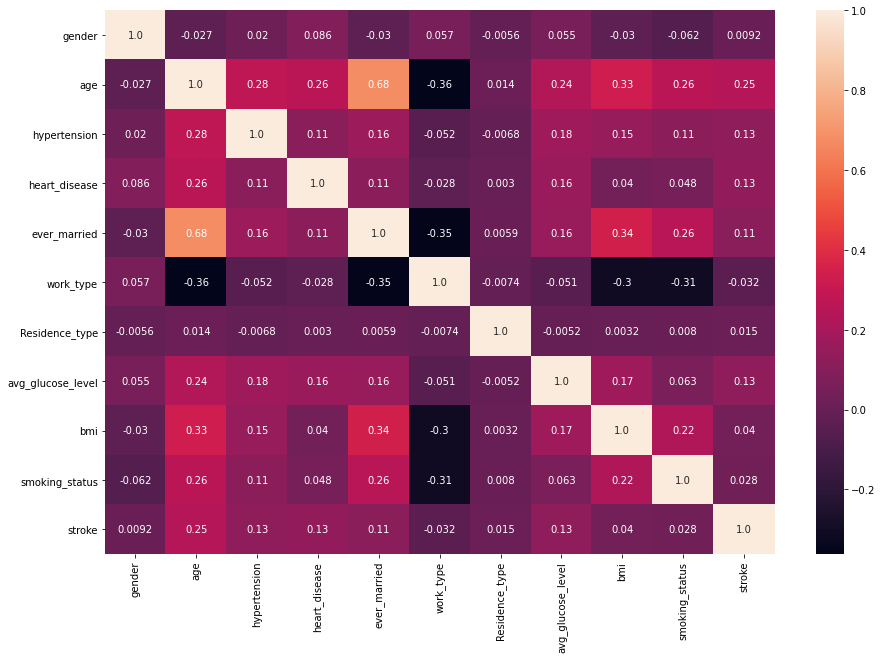

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(stroke_processed.corr(),annot=True,fmt='.2')

# Splitting Data

In [77]:
from sklearn.model_selection import train_test_split

In [124]:
df_train,df_test= train_test_split(stroke_processed,test_size=0.2,stratify=stroke_processed.stroke) 
#stratify will force the same class balance on the train and test dataset as the original data.

In [125]:
len(stroke_processed)

5107

C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

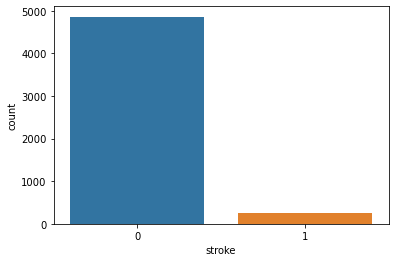

In [126]:
sns.countplot(stroke_processed.stroke)
#looking at the stroke distribution of the original dataset

In [127]:
len(df_test)

1022

C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

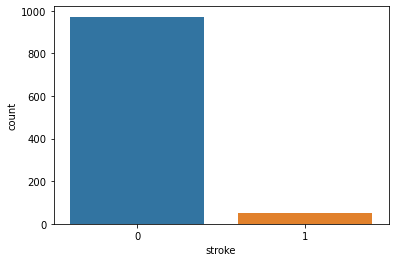

In [128]:
sns.countplot(df_test.stroke) # check if we have on the test dataset the same distribution as the original dataset

In [129]:
len(df_train)

4085

C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

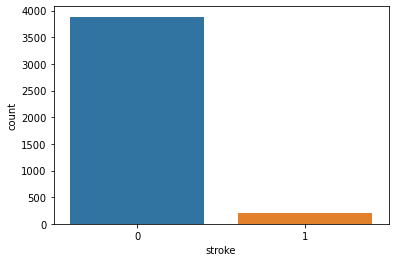

In [130]:
sns.countplot(df_train.stroke) # check if we have on the training dataset the same distribution as the original dataset

In [131]:
df_train.loc[df_train.stroke==1]#199/4085=4.87% (percentage of stroke cases on training set)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
218,0,76.0,1,1,1,3,1,199.86,28.89456,3,1
130,0,73.0,1,0,1,2,0,190.14,36.50000,2,1
145,1,66.0,0,0,1,2,1,151.16,27.50000,1,1
24,1,71.0,0,0,1,2,1,102.87,27.20000,1,1
183,0,77.0,0,0,0,2,1,81.32,28.89456,0,1
...,...,...,...,...,...,...,...,...,...,...,...
155,0,77.0,0,1,1,2,0,231.56,36.90000,2,1
248,0,78.0,0,0,1,2,0,78.81,19.60000,0,1
138,1,76.0,1,0,1,3,0,194.37,27.00000,1,1
132,1,69.0,1,0,0,2,0,182.99,36.50000,2,1


In [132]:
df_test.loc[df_test.stroke==1]#50 rows where stroke ==1. 50/1022=4.89% (percentage of stroke cases on testing set)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
125,0,72.0,0,0,1,0,1,131.41,28.40000,2,1
205,0,78.0,0,0,1,2,1,106.74,33.00000,1,1
246,0,75.0,0,0,1,3,0,78.80,29.30000,1,1
23,1,82.0,0,1,1,2,0,208.30,32.50000,0,1
74,0,52.0,0,0,1,2,0,96.59,26.40000,2,1
244,1,57.0,0,0,1,2,0,84.96,36.70000,0,1
115,1,71.0,1,1,0,0,0,216.94,30.90000,2,1
21,0,52.0,1,0,1,3,1,233.29,48.90000,2,1
93,0,80.0,1,0,1,3,1,68.56,26.20000,0,1
37,0,72.0,1,0,1,2,0,74.63,23.10000,1,1


In [133]:
df_train.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000,4085.000000
mean,0.411750,43.234536,0.093513,0.055814,0.653611,2.174786,0.510649,106.153789,28.828170,1.367442,0.048715
std,0.492211,22.689938,0.291185,0.229590,0.475877,1.094819,0.499948,45.300557,7.581419,1.071109,0.215298
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.820000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.680000,32.700000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,78.000000,3.000000,1.000000


In [134]:
df_test.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.421722,43.242583,0.111546,0.046967,0.667319,2.139922,0.499022,106.178571,29.030950,1.415851,0.048924
std,0.494076,22.323475,0.314961,0.211671,0.471404,1.073677,0.500244,45.241659,7.616865,1.073345,0.215814
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220000,13.000000,0.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.925000,24.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,0.000000,92.155000,28.500000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,115.380000,33.100000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,260.850000,64.400000,3.000000,1.000000


In [135]:
print(stroke_processed.mean())
print(df_train.mean())
print(df_test.mean()) 
# the split is giving us fairly equal numbers on most variables. Our target value: stroke is pretty much the same as the value from our original dataset. Therefore, we can say that our model is training well..  

gender                 0.413746
age                   43.236146
hypertension           0.097122
heart_disease          0.054043
ever_married           0.656354
work_type              2.167809
Residence_type         0.508322
avg_glucose_level    106.158749
bmi                   28.868750
smoking_status         1.377129
stroke                 0.048757
dtype: float64
gender                 0.411750
age                   43.234536
hypertension           0.093513
heart_disease          0.055814
ever_married           0.653611
work_type              2.174786
Residence_type         0.510649
avg_glucose_level    106.153789
bmi                   28.828170
smoking_status         1.367442
stroke                 0.048715
dtype: float64
gender                 0.421722
age                   43.242583
hypertension           0.111546
heart_disease          0.046967
ever_married           0.667319
work_type              2.139922
Residence_type         0.499022
avg_glucose_level    106.178571
bmi       

# LOGISTIC REGRESSION 

In [90]:
#X=features, y =target
#For X, we take all columns except stroke because that's on the y data.
#should exclude high correlation values?
X_train=df_train.loc[:,['gender','age','hypertension','heart_disease','work_type','Residence_type','ever_married','avg_glucose_level','bmi','smoking_status']].values
y_train=df_train.stroke.values

In [91]:
X_train

array([[0.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.62600000e+01,
        3.56000000e+01, 2.00000000e+00],
       [0.00000000e+00, 5.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.44160000e+02,
        2.60000000e+01, 3.00000000e+00],
       [1.00000000e+00, 5.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.07200000e+01,
        4.15000000e+01, 1.00000000e+00],
       [0.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 8.02400000e+01,
        2.89000000e+01, 2.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.20580000e+02,
        2.15000000e+01, 2.00000000e+00],
       [1.00000000e+00, 1.50000000e+01, 0.00000000e+00, 0.00000000e+00,
   

In [92]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
X_test = df_test.loc[:,['gender','age','hypertension','heart_disease','work_type','Residence_type','ever_married','avg_glucose_level','bmi','smoking_status']].values


In [94]:
y_test = df_test.stroke.values

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr_model = LogisticRegression(random_state=30,max_iter=1000)# RANDOM STATE TO GET SOMETHING MORE PRECISE. Max iterations will be 1000 

In [97]:
# here we are training the model
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=30)

In [98]:
y_test_predicted = lr_model.predict(X_test) #here we are testing the model on our test dataset 

In [99]:
y_test_predicted #what the model thinks of the stroke prediction.
#As we can see the model only provides non-stroke predictions. This is because of our imbalanced dataset.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
#Accuracy of the model. Getting the % of predictions. We have a really good % of 95. 
#This model will predict 95% of the times when we'll get a stroke. However, accuracy is not a good metrc on imbalanced datasets
(y_test_predicted == y_test).sum()/len(y_test)

0.9510763209393346

In [102]:
#we'll use to measure classification performance
from sklearn.metrics import confusion_matrix

In [103]:
#creation of the confussion matrix
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

In [104]:
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted)

In [105]:
cf

,y_test_0,y_test_1
y_pred_0,972,0
y_pred_1,50,0


In [106]:
from sklearn.metrics import classification_report

In [107]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)

C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [108]:
print(report) #we get a really high f1-score on non-stroke prediction. But a 0 on stroke prediction. 
#Therefore, let's use another alternative for our imbalanced dataset. We'll use SMOTE function.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



# Removing Highly Correlated Variables

In [160]:
#removing age and heart disease as they have high correlations
X_train2=df_train.loc[:,['gender','hypertension','work_type','Residence_type','ever_married','avg_glucose_level','bmi','smoking_status']].values
y_train2=df_train.stroke.values

In [161]:
#removing age and heart disease as they have high correlations
X_test2 = df_test.loc[:,['gender','hypertension','work_type','Residence_type','ever_married','avg_glucose_level','bmi','smoking_status']].values
y_test2 = df_test.stroke.values

In [162]:
lr_model.fit(X=X_train2, y=y_train2)

LogisticRegression(max_iter=1000, random_state=30)

In [163]:
y_test_predicted2 = lr_model.predict(X_test2)

In [164]:
y_test_predicted2 # got same results as before. Therefore, model did'nt improve by removing high correlated variables.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# SMOTE FUNCTION

In [109]:
#Using SMOTE on original model: using all variables.
from imblearn.over_sampling import SMOTE

In [110]:
#Balancing data with SMOTE function. It will create artificial observations with some noise (that way they won't be exact data duplicates)
smote=SMOTE()
X_train,y_train==smote.fit_resample(X_train,y_train)
X_test,y_test==smote.fit_resample(X_test,y_test)

C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\karlarodriguezjerez\anaconda3\envs\mlpython\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you me

(array([[1.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         4.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.05340000e+02,
         1.55000000e+01, 0.00000000e+00],
        [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.16620000e+02,
         2.88945599e+01, 3.00000000e+00],
        [0.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 6.91100000e+01,
         3.52000000e+01, 2.00000000e+00],
        [0.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
         2.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.15980000e+02,
         2.76000000e+01, 0.00000000e+00],
        [0.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
         2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.90000000e+01,
         2.50000000e+01, 2.00000000e+00],
        [1.00000000e+00, 4.30000000e+01, 0.00000000e+00, 0.0

In [111]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)# check the new shape of the data

(4085, 10) (4085,) (1022, 10) (1022,)


In [112]:
lr_model.fit(X=X_train, y=y_train) #fit model after balancing data with SMOTE

LogisticRegression(max_iter=1000, random_state=30)

In [113]:
y_test_predicted = lr_model.predict(X_test) 

In [114]:
y_test_predicted # We get the same numbers as before.
#Looks like we don't have enough data to use the Logistic Regression Model. We'll try with other models.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Decision Tree Model

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
# Try a Decision Tree classifier (non-linearv model)
dt_model = DecisionTreeClassifier()

In [138]:
dt_model.fit(X=X_train,y=y_train) #fitting the data with new model

DecisionTreeClassifier()

In [139]:
y_test_predicted_dt = dt_model.predict(X_test)

In [159]:
y_test_predicted_dt #with decision tree we can definitely see results in our stroke prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [140]:
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test) #get report with new predictions

In [141]:
print("Report of Decision Tree")

print(report_dt) # we have still a pretty high score in non-stroke results. And at least with this model we are getting something on our stroke prediction, it's pretty low tough.
# Let's try with other 2 models

Report of Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.14      0.20      0.16        50

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.92      0.90      0.91      1022



# Decision Tree removing highly correlated variables

In [166]:
dt_model.fit(X=X_train2,y=y_train2) #fitting the data with new model

DecisionTreeClassifier()

In [167]:
y_test_predicted_dt2 = dt_model.predict(X_test2) 

In [168]:
y_test_predicted_dt2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [171]:
report_dt = classification_report(y_pred=y_test_predicted_dt2,y_true=y_test)

In [172]:
print(report_dt)# we see better results without variable exclusion

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       972
           1       0.07      0.08      0.07        50

    accuracy                           0.90      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.90      0.91      1022



# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
# Try an ensemble classifier: Random Forest
rf_model = RandomForestClassifier()

In [144]:
rf_model.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [145]:
y_test_predicted_rf = rf_model.predict(X_test)

In [146]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)

In [147]:
print("Report of Random Forest model")
print(report_rf) # we are gettig the exact same numbers as with Logistic Regression. Therefore, this model won't be useful.

Report of Random Forest model
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



# Neural Network - MLP Classifier

In [149]:
from sklearn.neural_network import MLPClassifier

In [150]:
X_train.shape

(4085, 10)

In [152]:
nn_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)

In [153]:
nn_model.fit(X=X_train,y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [156]:
y_test_predicted_nn = nn_model.predict(X_test)

In [157]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)

In [158]:
print(report_nn) #Neural Network gives us the same score as Logistic Regression and Random Forest. 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



# Conclusion

We used four models (Logistic Regression, Decision Tree,Random Forest and MLP Classifier) to validate which factors 
could potentially facilitate a stroke. We had several variables that were highly correlated like age, hypertension, 
heart_disease,ever_married, avg_glucose, bmi and smoking_status.
We also had lots of outliers but I didn''t really remove a lot of them (only excluded a couple) since, for example,  it''s 
actually possible to see really high BMI''s on people who don''t suffer strokes. Therefore, it didn''t seem like the 
right path.      
The dataset was pretty imbalanced. For this, we used the SMOTE function but didn''t see much improvement in
the Logistic Regression Model.Then, we chose to remove highly correlated variables but we got pretty similar results in both 
LR as well as Decision Tree.
Decision Tree was the best model but our F1 score for a potential stroke(0.16) wasn''t wonderful either.As for Random Forest and MLP Classifier we had the exact same results as Logistic Regression (no prediction at all for stroke).
Therefore, we can conclude that the data used for this project wasn''t enough or maybe there could be other models that
could be a better fit for this dataset.

